In [4]:
import camelot as cm

# To run Camelot without problems
We have to install Ghostscript and then we have to add _Program Files/gs/gsversion/lib_ and _Program Files/gs/gsversion/bin_ to the PATH as environment variables.

In [5]:
! ls

Automate
Extracting table from PDF.ipynb
TED Talk.mp4
TED_talk_downloader.py
india_factsheet_economic_n_hdi.pdf
news-scraper.py
requirements.txt
secret.json
table_from_pdf.csv
table_from_pdf.xlsx


In [6]:
# flavour = "stream", "lattice"

In [7]:
input_pdf = cm.read_pdf("india_factsheet_economic_n_hdi.pdf", flavor='lattice', pages='1,2')

Also could be with the link:
    input_pdf = cm.read_pdf("https://www.undp.org/content/dam/india/docs/india_factsheet_economic_n_hdi.pdf", flavor='lattice', pages='1,2')

In [8]:
input_pdf

<TableList n=4>

In [9]:
for n in input_pdf:
    print(n)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>
<Table shape=(13, 3)>


In [10]:
input_pdf[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [11]:
df = input_pdf[2].df.loc[11:14,1:3]

In [12]:
df

,1,2,3
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [13]:
df = df.reset_index(drop=True)

In [14]:
df.columns = ['KPI','2001', '2011']
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [15]:
df.loc[:,['2001','2011']] = df.loc[:,['2001','2011']].astype(float)

In [16]:
df.to_csv('table_from_pdf.csv')

In [17]:
! ls 

Automate
Extracting table from PDF.ipynb
TED Talk.mp4
TED_talk_downloader.py
india_factsheet_economic_n_hdi.pdf
news-scraper.py
requirements.txt
secret.json
table_from_pdf.csv
table_from_pdf.xlsx


In [18]:
df.to_excel('table_from_pdf.xlsx')

In [19]:
! ls

Automate
Extracting table from PDF.ipynb
TED Talk.mp4
TED_talk_downloader.py
india_factsheet_economic_n_hdi.pdf
news-scraper.py
requirements.txt
secret.json
table_from_pdf.csv
table_from_pdf.xlsx


In [20]:
import pandas as pd 

In [22]:
df2 = pd.read_csv("table_from_pdf.csv")
df2

,Unnamed: 0,KPI,2001,2011
0,0,Literacy Rate (%),64.8,74.04
1,1,Male Literacy Rate (%),75.3,82.14
2,2,Female Literacy Rate (%),53.7,65.46


In [23]:
import seaborn as sns

In [31]:
df_melted = df.melt('KPI', var_name='Year', value_name='Percentage')
df_melted

,KPI,Year,Percentage
0,Literacy Rate (%),2001,64.8
1,Male Literacy Rate (%),2001,75.3
2,Female Literacy Rate (%),2001,53.7
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


<AxesSubplot:xlabel='KPI', ylabel='Percentage'>

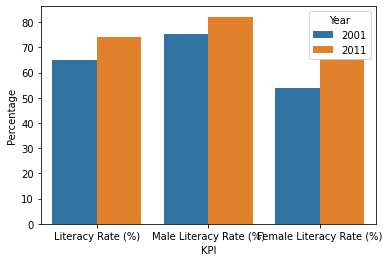

In [32]:
sns.barplot(x = 'KPI', y = 'Percentage', hue ='Year', data=df_melted)